# Linear Regression

## The Normal Equation

In [87]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

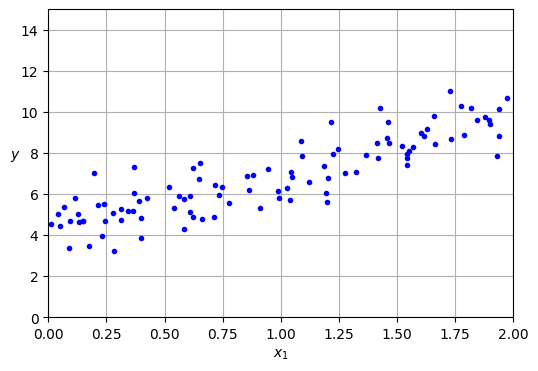

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()
plt.show()

In [89]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance, Xbar
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # normal equation

In [90]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [91]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1
y_predict = X_new_b @ theta_best # predictions for X_new
y_predict

array([[4.21509616],
       [9.75532293]])

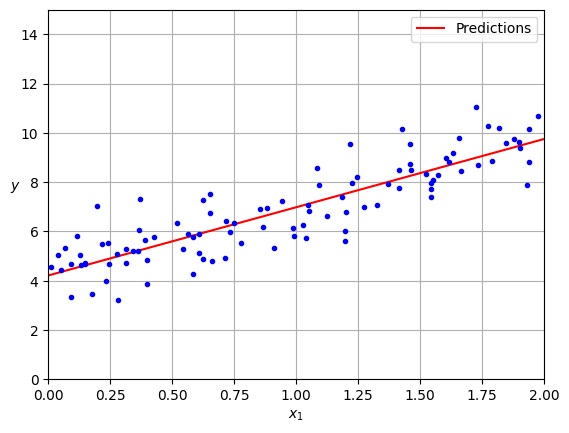

In [92]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.legend()
plt.grid()
plt.show()

In [93]:
from re import L
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [94]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares")

In [95]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

### Explanation of `np.linalg.lstsq` Parameters and Return Values

**Parameters:**
- `X_b`: The design matrix (independent variables) with shape `(m, n)`.
- `y`: The target vector (dependent variable) with shape `(m, 1)`.
- `rcond`: Cutoff for small singular values. Singular values smaller than `rcond` times the largest singular value are treated as zero. Default is `-1` (machine precision).

**Return Values:**
- `theta_best_svd`: The least-squares solution (coefficients).
- `residuals`: The sum of squared residuals (difference between observed and predicted values). Empty if the solution is exact.
- `rank`: The effective rank of the matrix `X_b`.
- `s`: Singular values of `X_b`.

In [96]:
np.linalg.pinv(X_b) @ y # giả ma trận

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [97]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [98]:
theta

array([[4.21509616],
       [2.77011339]])

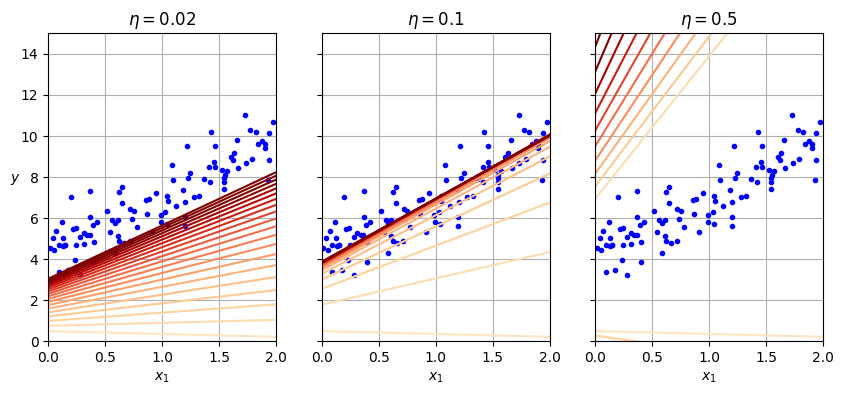

In [99]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15)) # type: ignore
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        grandients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * grandients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis((0, 2, 0, 15))
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plot_gradient_descent(theta, eta=0.5)
plt.show()



## Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, stochastic gradient descent picks
a random instance in the training set at every step and computes the gradients based
only on that single instance

In [100]:
theta_path_sgd = []

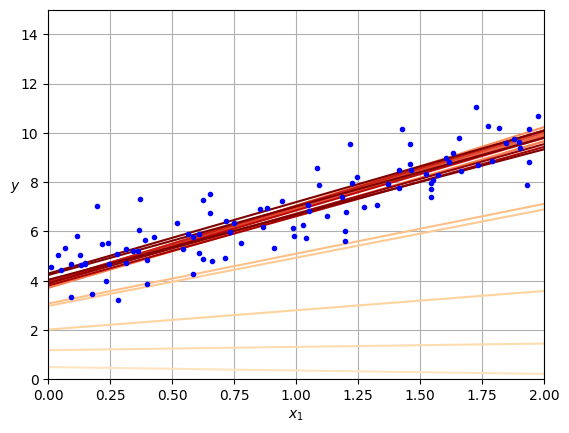

In [101]:
import random


n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
n_shown = 20

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15)) # type: ignore
            plt.plot(X_new, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()
plt.show()

In [102]:
theta

array([[4.21076011],
       [2.74856079]])

In [103]:
# try with sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100,
                       random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [104]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

At each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches

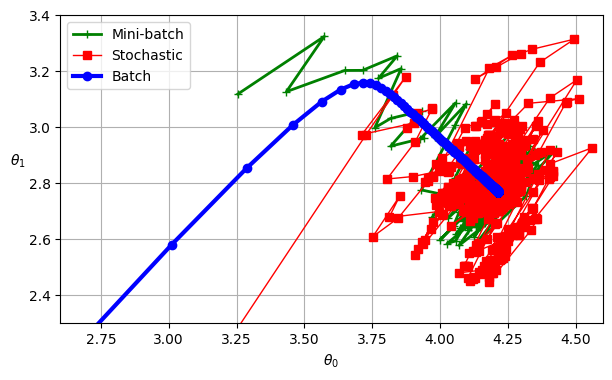

In [105]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis((2.6, 4.6, 2.3, 3.4))
plt.grid()
plt.show()

# Polynomial Regression

Dành cho những trường hợp bộ dữ liệu phức tạp hơn dạng đường thằng

In [106]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

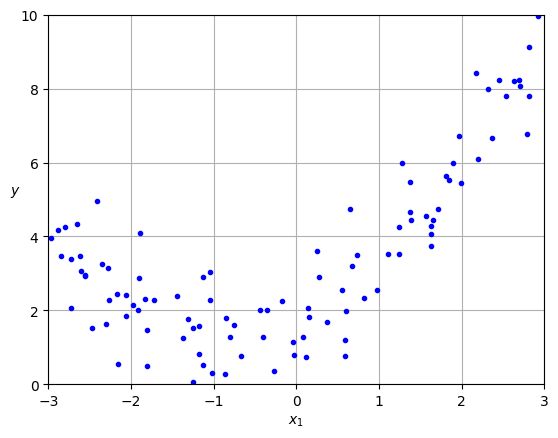

In [107]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((-3, 3, 0, 10))
plt.grid()
plt.show()

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) #
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [109]:
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

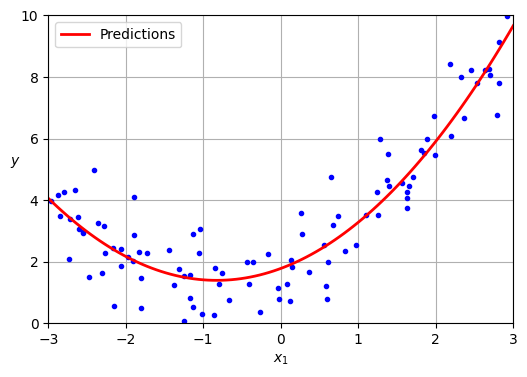

In [111]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis((-3, 3, 0, 10))
plt.grid()
plt.show()

# Learning Curves

If you perform high-degree polynomial regression, you will likely fit the training
data much better than with plain linear regression.

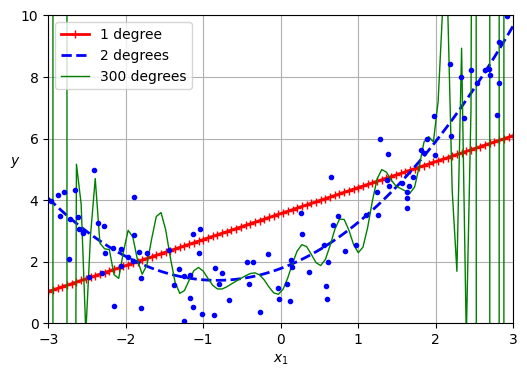

In [112]:
# extra code – this cell generates and saves Figure 4–14
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((-3, 3, 0, 10))
plt.grid()
plt.show()

Mô hình polynomial regression bậc cao này đang bị overfit với training data, tring khi linear model thì underfit.

Chúng ta sử dụng cross-validation để có được ước tính về hiệu suất tổng quát của mô hình. Nếu có hiệu suất tốt trên tập train và hiệu suất thấp theo số liệu cross-validation thì bị overfit, cả 2 đều thấp thì underfit. Đây là một cách để biết khi nào một mô hình quá đơn giản hay quá phức tạp.

Một cách khác đó là nhìn vào `learning curves` là các biểu đồ train error và validation error của mô hình theo hàm của lần lặp đào tạo: chỉ cần đánh giá mô hình theo các khoảng thời gian đều đặn trong quá trình đào tạo trên cả train data và validation data. Nếu mô hình không hỗ trợ huấn luyện gia tăng, ta cần huấn luyện nó nhiều lần trên các tập con lớn dần của tập train.

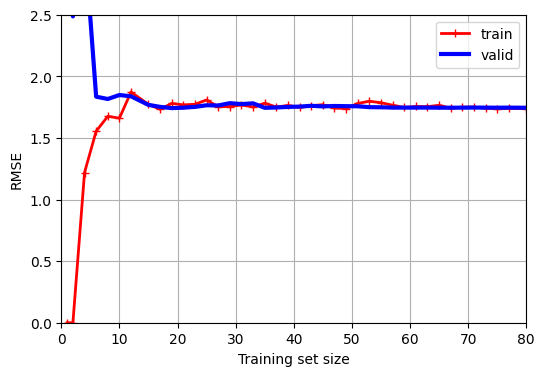

In [113]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve( # type: ignore
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5]) # type: ignore
plt.show()

Mô hình này đang bị underfitting. Nhìn vào train error, khi chỉ có 1 hoặc 2 instance, mô hình có thể khớp rất tốt, nhưng nếu thêm các instance mới mô hình không thể phù hợp hoàn hảo với dữ liệu đào tạo, một phần vì dữ liệu nhiễu và một phần vì không còn tuyến tính nữa. Vì vậy, train error tăng lên cho đến khi đạt đến ngưỡng, tại thời điểm đó, việc thêm các trường hợp mới vào train data không làm cho lỗi trung bình tốt hơn hay tệ hơn nhiều.

Nhìn vào validation error, khi mô hình được huấn luyện với một số ít instance, nó không thể khái quát đúng caschm vì vậy validation error cao. Sau đó, khi mô hình có thêm train data, nó được tối ưu và do đó validation error giảm dần. Tuy nhiên, một lần nữa, đường thẳng không thể thực hiện tốt việc mô hình hóa dữ liệu, do đó lỗi kết thúc ở một ngưỡng, rất gần với đường cong khác.

Những learning curves này là điển hình của một mô hình underfitting. Cả hai đường cong đều đạt đến một ngưỡng; chúng gần và khá cao.

**Lưu ý:** Nếu mô hình của bạn bị underfitting, việc thêm nhiều ví dụ đào tạo sẽ không có ích. Cần sử dụng mô hình tốt hơn hoặc đưa ra các tính năng tốt hơn.

In [114]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(
    0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")[:3]

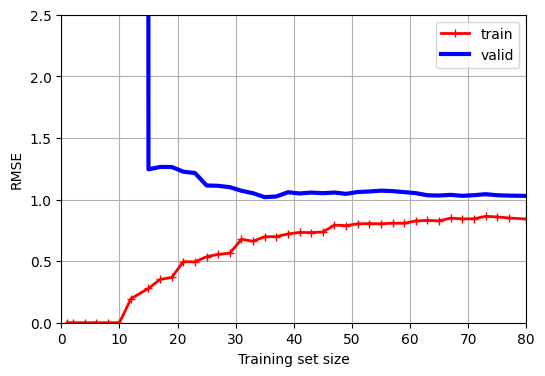

In [115]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5]) # type: ignore
plt.show()

Có 2 điểm khác nhau quan trọng so với leanrning curves ở trên:
- Training error nhỏ hơn nhiều so với trước
- Có khoảng cách giữa 2 đường cong. Điều này có nghĩa là mô hình hoạt động tốt hơn đáng kể trên train data so với validation data, đây là dấu hiệu của overfitting. Tuy nhiên nếu train data lớn hơn nhiều 2 đường cong sẽ gần nhau hơn

**Lưu ý:** Một cách để cải thiện mô hình overfitting cung cấp thêm dữ liệu đào tạo cho đến khi lỗi xác thực đạt đến lỗi đào tạo.

# Regularized Linear Models

Regularization, một cách cơ bản, là thay đổi mô hình một chút để tránh overfitting trong khi vẫn giữ được tính tổng quát của nó (tính tổng quát là tính mô tả được nhiều dữ liệu, trong cả tập training và test)

## Ridge Regression

**Ridge regression (also called Tikhonov regularization)** là 1 regularized của Linear Regression. Một đại lượng $\frac{\alpha}{m} \sum_{i=1}^n \theta_i^2$ được cộng vào hàm MSE, chỉ sử dụng để tính toán hàm mất mát khi train, để đánh giá mô hình vẫn phải sử dụng unregularized MSE (hoặc RMSE). Điều này khiến thuật toán học không chỉ phải phù hợp với dữ liệu mà còn phải giữ cho trọng số ở mức nhỏ nhất có thể.

Hyperparameter $\alpha$ để điều khiển độ mạnh yếu của đại lượng regularization. Nếu $\alpha$ rất lớn, các trọng số sẽ gần với 0 và kết quả là một đường đi qua giá trị trung bình của dữ liệu

*Ridge regression cost function*

$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \frac{\alpha}{m} \sum_{i=1}^n \theta_i^2$

In [116]:
# Let's generate a very small and noisy linear dataset:
import numpy as np

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

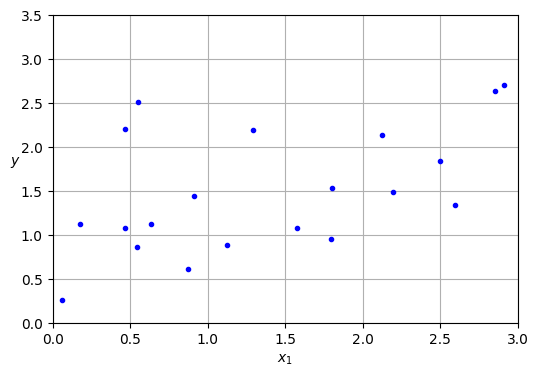

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 3, 0, 3.5))
plt.grid()
plt.show()

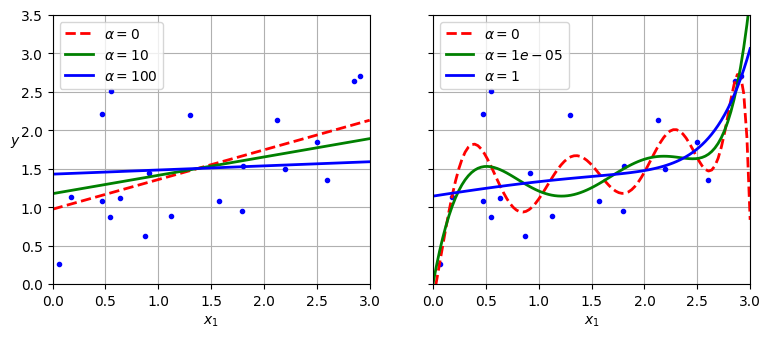

In [118]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("r--", "g-", "b-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis((0, 3, 0, 3.5))
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plt.show()

In [119]:
ridge = Ridge(alpha=0.1, solver="cholesky")
ridge.fit(X, y)
ridge.predict([[1.5]]) # type: ignore

array([1.55325833])

In [120]:
# try use SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=None, alpha=0.1/m,
                       penalty="l2", eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # type: ignore
sgd_reg.predict([[1.5]]) # type: ignore

array([1.55302613])

penalty="l2" to use ridge regression, so alpha = "0.1/m"

## Lasso Regression

Là một dạng regularization của linear regression, tương tự như Ridge nhưng sử dụng $l_1 norm$ thay vì $l_2 norm$ như Ridge

*Lasso regression cost function*

$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + 2{\alpha} \sum_{i=1}^n \| \theta_i \|$

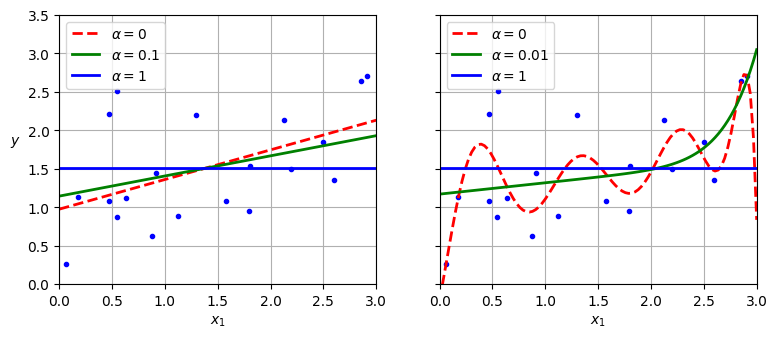

In [121]:
from sklearn.linear_model import Lasso


plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$    ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plt.show()

Một đặc điểm quan trọng của lasso regression là nó có xu hướng loại bỏ những trọng số ít quang trọng nhất. Ví dụ, nhìn vào đường màu xanh lục, tất cả trọng số bậc cao của đa thức bằng 0. Nói cách khác lasso regression tự động lựa chọn feature và đưa ra *model spare* với một vài feature khác 0.

## Elastic Net Regression

Nằm ở giữa ridge regression và lasso regression. Biểu thức regularization là tổng giữa ridge regression và lasso regression, và có thể kiểm soát tỉ lệ thông qua tham số r, khi r = 0 biểu thức trở thành ridge regression, khi r = 1 biểu thức trở thành lasso regression

*Elastic net cost function*

$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + r(2{\alpha} \sum_{i=1}^n \| \theta_i \|) + (1-r)(\frac{\alpha}{m} \sum_{i=1}^n \theta_i^2)$

Hầu hết các trường hợp đều nên có regularzation, vì vậy nên tránh linear regression thuần.

Ridge là một mặc định được sử dụng, nếu bạn cho rằng chỉ có một vài features quan trọng, có thể sử dụng lasso hoặc elastic vì nó làm giảm các tính năng không quan trọng

Nhìn chung elastic được ưa chuộng hơn lasso vì lasso có thể hoạt động không ổn định khi số lượng feature lớn hơn số lượng mẫu hoặc khi một số feature có mối tương quan mạnh

In [122]:
from sklearn.linear_model import ElasticNet
elacstic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elacstic_net.fit(X, y)
elacstic_net.predict([[1.5]]) # type: ignore

array([1.54333232])

## Early Stopping

Là một cách khác để chuẩn hóa thuật toán học lặp (như GD) bằng cách dừng ngay khi validation error đạt nhỏ nhất

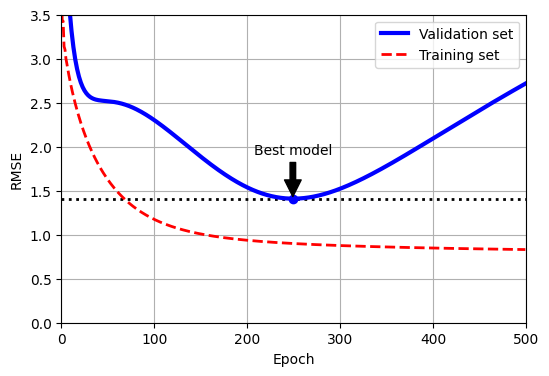

In [123]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse), # type: ignore
             xytext=(best_epoch, best_valid_rmse + 0.5),# type: ignore
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)# type: ignore
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])# type: ignore
plt.grid()
plt.show()

# Logistic Regression

Là một thuật toán regression nhưng được sử dụng nhiều cho bài toán classification. Đưa ra các dự đoán dưới dạng xác suất

## Estimating Probabilities

Mô hình tính toán tổng các trọng số của input features, nhưng thay vì đưa ra kết quả trực tiếp như linear regression, output là dạng *logicstic*

<Figure size 800x300 with 0 Axes>

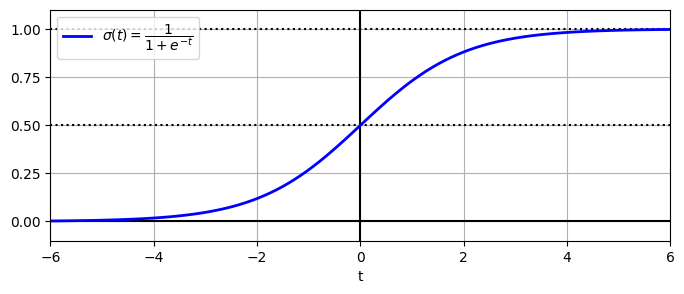

In [124]:
lim =6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8,3))
plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1]) # type: ignore
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

Khi dự đoán mô hình sẽ so sánh xác suất với một ngưỡng để phân loại xem kết quả là class positive hay negative

## Decision Boundaries

In [125]:
# use iris dataset to illustrate logistic regression

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [126]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [128]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [129]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

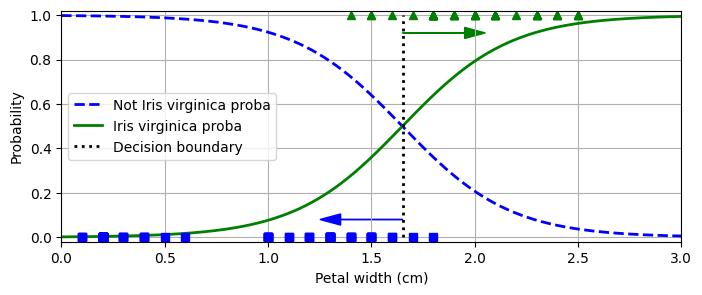

In [131]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis((0, 3, -0.02, 1.02))
plt.grid()

plt.show()

Chiều rộng cánh hoa của hoa *Iris virginica* (hình tam giác) dao động từ 1,4cm đến 2,5cm, trong khi đó các hoa Iris khác (hình vuông) thường có chiều rộng cánh hoa nhỏ hơn, dao động từ 0,1 cm đến 1,8 cm. Nhưng có một ít chồng chéo. Trên khoảng 2cm, classifiers đưa ra xác suất cao cho lớp *virginica*, trong khi dưới 1 cm nó xác suất cao là không phải *virginica*. 

Có một ranh giới quyết định ở khoảng 1,6 cm, tại đó cả hai xác suất đều bằng 50%: nếu chiều rộng cánh hoa lớn hơn 1,6 cm, bộ phân loại sẽ dự đoán *Iris virginica* và ngược lại

In [132]:
decision_boundary

np.float64(1.6516516516516517)

In [133]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## Softmax Regression

Mô hình **logistic regression** có thể được tổng quát hóa để hỗ trợ **multiple classes** trực tiếp, mà không cần phải đào tạo và kết hợp nhiều **binary classifiers**. Đây được gọi là **Softmax Regression** hoặc **multinomial logistic regression**

Ý tưởng rất đơn giản: khi nhận một instance $\mathbf{x}$, Softmax Regression sẽ tính điểm $s_k(\mathbf{x})$ cho mỗi lớp $k$, sau đó sẽ ước tính xác suất cho mỗi class bằng cách áp dụng *softmax function*

In [134]:
# try softmax with iris dataset
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [135]:
softmax_reg.predict([[5, 2]])

array([2])

In [136]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

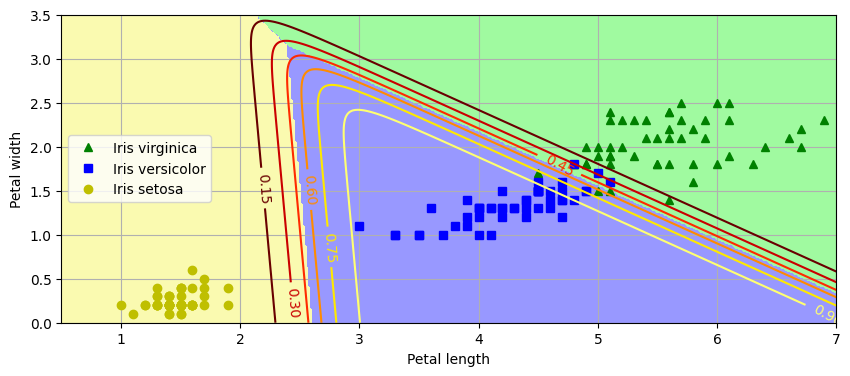

In [137]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

Đường cong thể hiện xác suất cho lớp Iris versicolor (VD, đường cong được đánh nhãn 0.3 thể hiện ranh giới xác suất 30%)

# Exercises

## 1

**Question: Which linear regression training algorithm can you use if you have a training set with millions of features?**

Nếu tạp train có hàng triệu thuộc tính, ta có thể sử dụng SGD hoặc Mini-batch GD, hoặc cũng có thể GD nếu tập train phù hợp với bộ nhớ. Nhưng bạn không thể sử dụng Normal Equation hoặc SVD vì độ phức tạp tính toán tăng nhanh (nhiều hơn bậc hai) với số lượng các tính năng.

## 2

**Question: Suppose the features in your training set have very different scales. Which
algorithms might suffer from this, and how? What can you do about it?**

Nếu các feature trong tập train có khoảng giá trị rất khác nhau, hàm mất mát sẽ có dạng cái bát dài, các thuật toán GD sẽ mất nhiều thời gian để hội tụ. Để giải quyết vấn đề này, cần phải scale dữ liệu trước khi đào tạo mô hình. 

Lưu ý rằng phương pháp Normal Equation hoặc SVD sẽ hoạt động tốt mà không cần scale

Hơn nữa các  regularized models có thể hội tụ thành một đáp án tối ưu nếu được giữ nguyên, vì regularization sẽ xử phạt các trọng số lớn, các feature có ít giá trị sẽ có xu hướng bị bỏ qua

## 3

**Question: Can gradient descent get stuck in a local minimum when training a logistic
regression model?**

GD không thể kẹt ở local minimum khi huấn luyện Logistic Regression vì hàm mất mát là lồi (convex). Lồi có nghĩa là nếu bạn vẽ một đường thẳng nối giữa hai điểm bất kỳ trên đường cong thì đường thẳng đó sẽ không bao giờ cắt đường cong.

## 4

**Question: Do all gradient descent algorithms lead to the same model, provided you let
them run long enough?**

Nếu bải toán tối ưu là convex (như Linear Regression và Logistic Regression), giả sử learning rate không quá cao, sau các thuật toán GD đều đạt được một điểm global optimum và kết thúc bằng 1 mô hình khá giống nhau. Tuy nhiên, trừ khi giảm dần learning rate, SGD và mini-batch GD sẽ không bao giờ thực sự hội tụ, thay vào đó nó sẽ nhảy qua lại xung quang global optimum. Điều này có nghĩa là ngay cả khi bạn để chúng chạy trong một thời gian rất dài, các thuật toán GD này sẽ tạo ra các mô hình hơi khác nhau.

## 5

**Question: Suppose you use batch gradient descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what
is likely going on? How can you fix this?**

Nếu validate error tăng sau mỗi epoch thì có thể là do learning rate quá cao và thuật toán đang chuyển hướng (đi qua local minimum). Nếu training error cũng tăng, chắc chắn là learning rate quá cao. Nếu train error không tăng lên, thì mô hình của bạn đang overfit và bạn nên ngừng đào tạo.

## 6

**Question: Is it a good idea to stop mini-batch gradient descent immediately when the
validation error goes up?**

Do bản chất ngẫu nhiên của chúng, cả SGD và Mini-batch GD đều không đảm bảo sẽ đạt đươc tiến triển ở mỗi lần lặp đào tạo. Vậy nếu dừng ngay khi validation error tăng, có thể nó chưa đạt được global optimum. Một lựa chọn tốt hơn là lưu mô hình theo các khoảng thời gian đều đặn; sau đó, khi mô hình không được cải thiện trong một thời gian dài (không thể tốt được hơn), bạn có thể quay lại mô hình đã lưu tốt nhất

## 7

**Question: Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?**

SGD cho phép lặp đào tạo nhanh nhất vì nó chỉ sử dụng 1 instance tại mỗi thời điểm, vì vậy nó có thể đạt tới global optimum sớm nhất (hoặc Mini-batch GD với mini-batch có cỡ cực nhỏ). Tuy nhiên chỉ Batch GD mới thực sự hội tụ, SGD và mini-batch GD sẽ nhảy xung quanh điểm global optimum, trừ khi giảm dần learning rate.

## 8

**Question: Suppose you are using polynomial regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?**

Nếu validation error lớn hơn nhiều so với train error, mô hình đang bị overfitting với train data. Một cách để giảm thiểu là giảm bậc của đa thức hoặc là điều chỉnh mô hình bằng các biện pháp regularization. Ví dụ thêm $l_2$ penalty (Ridge) hoặc $l_1$ penalty (Lasso) vào hàm mất mát. Hoặc chúng ta có thể tăng kích thước của training set

## 9

**Question: Suppose you are using ridge regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that
the model suffers from high bias or high variance? Should you increase the
regularization hyperparameter $\alpha$ or reduce it?**

Nếu validation error và training error đều cao thì mô hình bị underfitting, nghĩa là độ lệch cao, Chúng ta nên giảm hyperparameter $\alpha$

## 10

**Question: Why would you want to use:**

**a. Ridge regression instead of plain linear regression (i.e., without any regularization)?**

**b. Lasso instead of ridge regression?**

**c. Elastic net instead of lasso regression?**

a. Theo thực nghiệm thường mô hình có regularization sẽ hoạt động tốt hơn là không có

b. Lasso sử dụng $l_1$ penalty có xu hướng đẩy trọng số xuống đúng bằng 0, điều này làm mô hình có các trọng số đều bằng 0 trừ các trọng số quan trọng nhất (sparse). Điều này tốt hơn nếu ta cho rằng có các features thực sự quan trọng. Khi không chắc chắn, nên sử dụng Ridge

c. Elastic thường được ưa chuộng hơn vì Lasso không hoạt động ổn định trong một số trường hợp (khi môt số feature có mối tương quan mạnh hoặc khi có nhiều feature hơn số lượng mẫu). Tuy nhiên ta có thể điều chỉnh các hyperparameters để hạn cheess ảnh hưởng của Lasso $(l1_{ratio})$

## 11

**Question: Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?**

Nếu bạn muốn phân loại ảnh thành ngoài trời/trong nhà và ban ngày/ban đêm, vì đây không phải là các lớp loại trừ (tức là cả bốn kết hợp đều có thể xảy ra), nên sử dụng 2 logistic regression

## 12

**Question: Implement batch gradient descent with early stopping for softmax regression
without using Scikit-Learn, only NumPy. Use it on a classification task such as
the iris dataset.**

In [138]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [139]:
X_with_bias = np.c_[np.ones(len(X)), X] # add x0 = 1 to each instance

In [140]:
# train test split

import test


test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [141]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [142]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [143]:
# standard scale
mean = X_train[:, 1:].mean(axis=0)
std= X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [144]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sum = exps.sum(axis=1, keepdims=True)
    return exps / exp_sum

In [145]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [146]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


In [147]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [148]:
logits = X_valid @ Theta
y_proba = softmax(logits)
y_predict = y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

In [149]:
# add l1 regularization

eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] # add l2 regularization
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.22736593384333217
2000 0.22732998327689788
3000 0.2273299089101483
4000 0.2273299087388315
5000 0.2273299087383376


In [150]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

Thêm l2 chưa có sự thay đổi nhiều

In [153]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.inf

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


In [154]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

Không thay đổi nhưng thời gian train đã giảm đáng kể

In [ ]:
# test on test set
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

np.float64(0.9666666666666667)